In [1]:
import os
import sys


In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
# Import necessary functions from portfolio_analysis
from data_preprocess_eda import (fetch_data, clean_data, display_statistics, 
                                normalize_data, plot_closing_prices, calculate_daily_pct_change,
                                plot_daily_pct_change, calculate_rolling_stats, plot_rolling_std, 
                                detect_outliers, decompose_seasonality, calculate_var, calculate_sharpe_ratio,save_to_csv)


In [4]:
# Define parameters
assets = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

In [5]:
# Fetch and clean data
data = fetch_data(assets, start_date, end_date)
data = clean_data(data)


[*********************100%***********************]  3 of 3 completed
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\scripts\data_preprocess_eda.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [15]:
# Save cleaned data to CSV
save_to_csv(data, "cleaned_financial_data.csv")


In [7]:
# Display data statistics
display_statistics(data)

# Normalize data if required
data_scaled = normalize_data(data, assets)

Ticker         TSLA                                                      \
Price          Open         High          Low        Close    Adj Close   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.461872   113.895836   108.869421   111.438965   111.438965   
std      110.208156   112.643277   107.541830   110.120450   110.120450   
min        9.488000    10.331333     9.403333     9.578000     9.578000   
25%       17.058499    17.368167    16.790167    17.066167    17.066167   
50%       24.986667    25.279000    24.462334    25.043000    25.043000   
75%      217.264999   221.910004   212.084999   216.865002   216.865002   
max      411.470001   414.496674   405.666656   409.970001   409.970001   

Ticker                        SPY                                         \
Price         Volume         Open         High          Low        Close   
count   2.474000e+03  2474.000000  2474.000000  2474.000000  2474.000000   
mean    1.125745e+08 

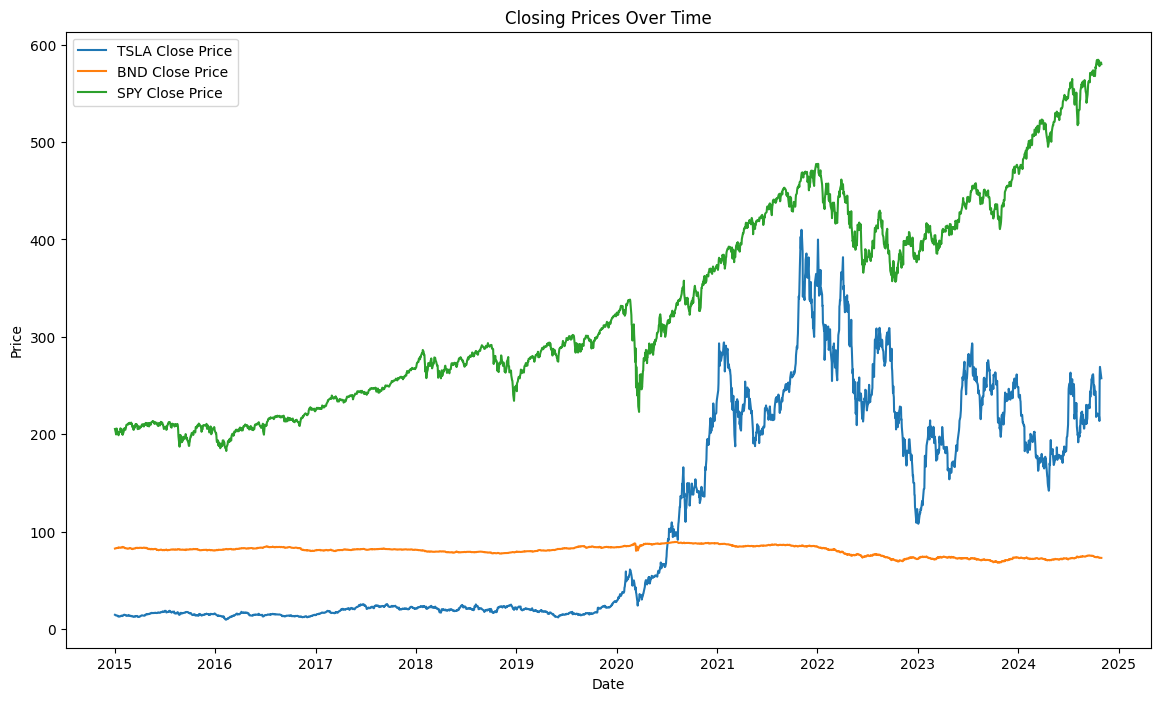

In [8]:
# Plot closing prices
plot_closing_prices(data, assets)

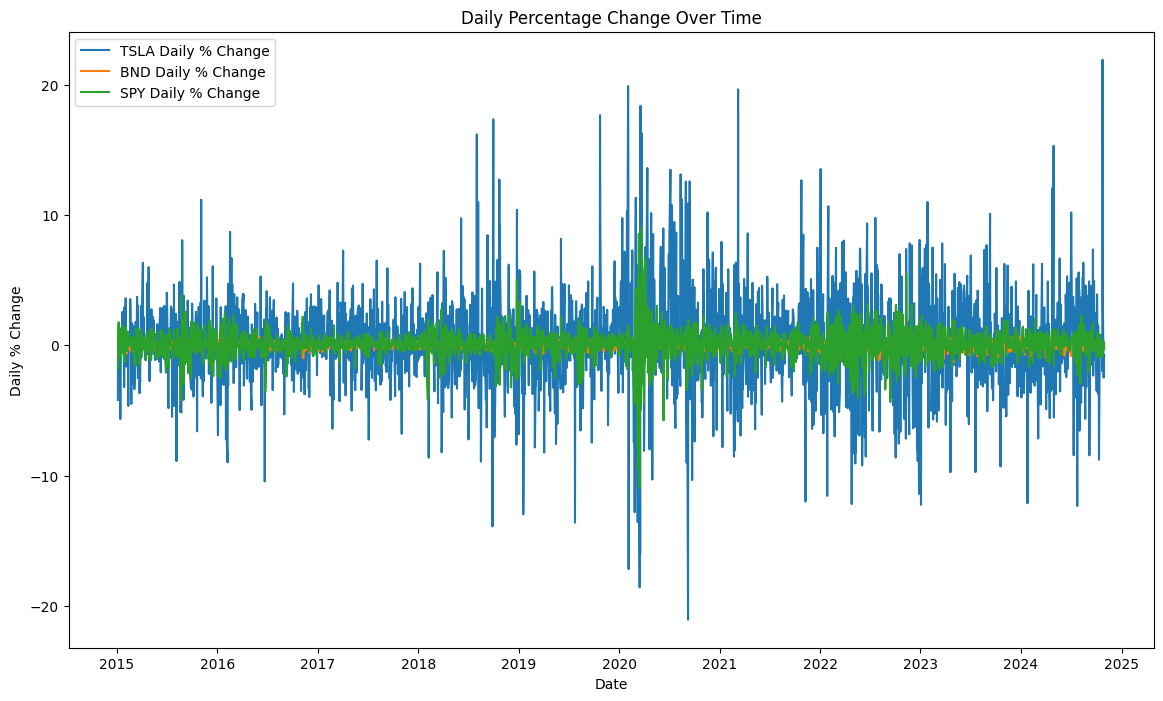

In [9]:
# Calculate and plot daily percentage change
data = calculate_daily_pct_change(data, assets)
plot_daily_pct_change(data, assets)


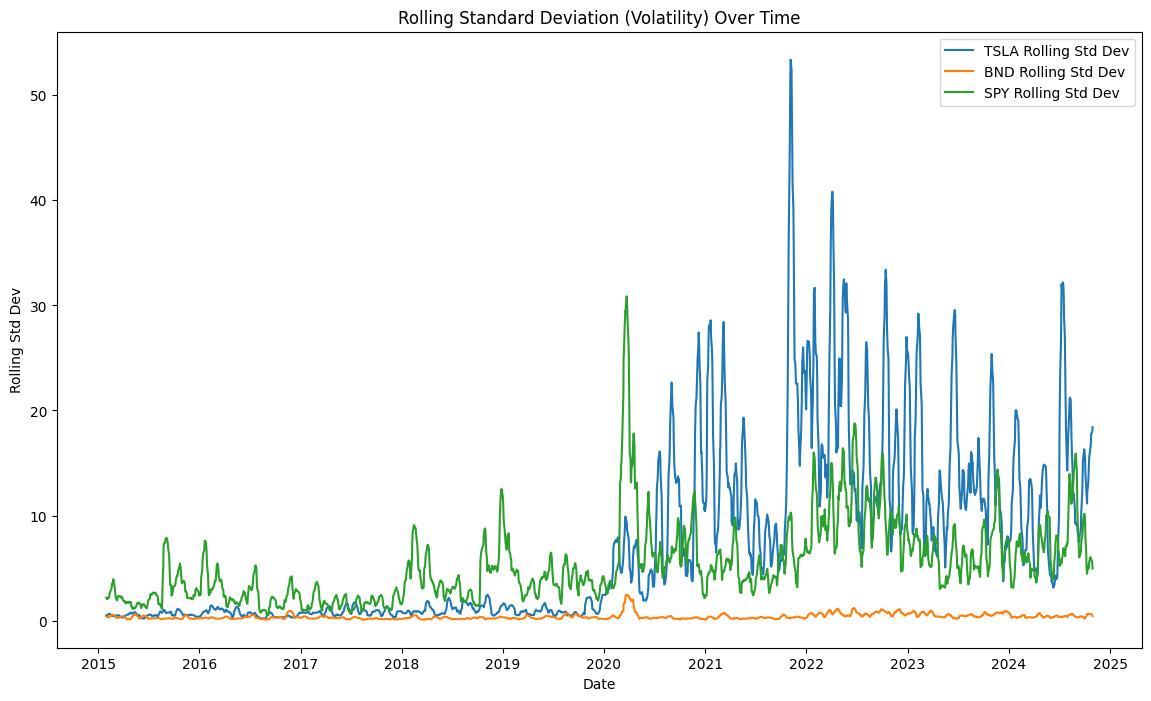

In [10]:
# Calculate rolling stats and plot rolling standard deviation
data = calculate_rolling_stats(data, assets)
plot_rolling_std(data, assets)

In [11]:
# Detect outliers
outliers = detect_outliers(data, assets)
print("Outliers:\n", outliers)

Outliers:
 {'TSLA': Date
2015-11-04 00:00:00+00:00    11.173506
2018-08-02 00:00:00+00:00    16.188013
2018-08-07 00:00:00+00:00    10.988624
2018-09-28 00:00:00+00:00   -13.901537
2018-10-01 00:00:00+00:00    17.347133
2018-10-23 00:00:00+00:00    12.718905
2019-01-18 00:00:00+00:00   -12.971116
2019-07-25 00:00:00+00:00   -13.613708
2019-10-24 00:00:00+00:00    17.669232
2020-02-03 00:00:00+00:00    19.894859
2020-02-04 00:00:00+00:00    13.725640
2020-02-05 00:00:00+00:00   -17.175839
2020-02-27 00:00:00+00:00   -12.814584
2020-03-02 00:00:00+00:00    11.322034
2020-03-09 00:00:00+00:00   -13.572526
2020-03-12 00:00:00+00:00   -11.617242
2020-03-16 00:00:00+00:00   -18.577806
2020-03-18 00:00:00+00:00   -16.034404
2020-03-19 00:00:00+00:00    18.387684
2020-03-24 00:00:00+00:00    16.281749
2020-04-13 00:00:00+00:00    13.603839
2020-07-06 00:00:00+00:00    13.479394
2020-08-12 00:00:00+00:00    13.123639
2020-08-17 00:00:00+00:00    11.203058
2020-08-31 00:00:00+00:00    12.568905


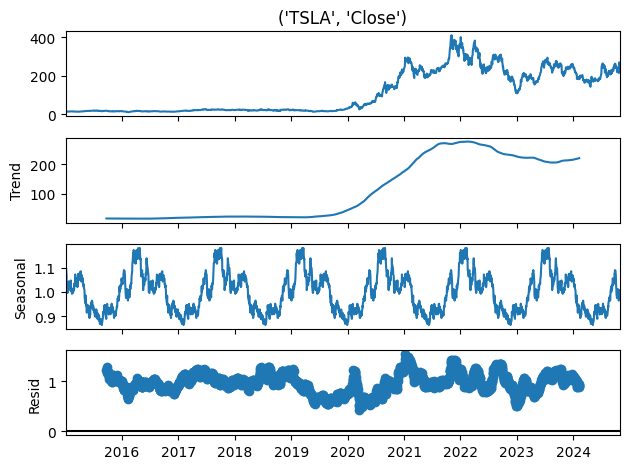

In [12]:
# Decompose seasonality for a selected asset (e.g., TSLA)
decompose_seasonality(data, "TSLA")

In [13]:
# Calculate VaR and Sharpe Ratio
var = calculate_var(data, assets)
print("VaR:\n", var)

VaR:
 {'TSLA': np.float64(-5.125703646165556), 'BND': np.float64(-0.5082926147970168), 'SPY': np.float64(-1.6798401951985453)}


In [14]:
sharpe_ratios = calculate_sharpe_ratio(data, assets)
print("Sharpe Ratios:\n", sharpe_ratios)

Sharpe Ratios:
 {'TSLA': np.float64(0.7973376865205232), 'BND': np.float64(-0.20501754503711653), 'SPY': np.float64(0.6839295358690684)}
